### NQ Data Analysis
This notebook is focused on exploratory data analysis (EDA) of the NQ (Natural Questions) dataset. The workflow includes:

- Loading a large JSONL corpus into a pandas DataFrame.
- Displaying basic dataset information such as shape, column types, and sample records.
- Analyzing the distribution and frequency of document titles.
- Checking for missing values and basic statistics on text length.
- Visualizing the distribution of text lengths.

**Dataset Details:**
- Source file: `/data/NQ/nq/corpus.jsonl`
- Number of records: 2,681,468
- Main columns: `_id`, `title`, `text`, `metadata`, `text_length`
- The dataset contains Wikipedia-like articles, each with a unique ID, title, and text content.

**User Goals:**
- Understand the structure and content of the NQ dataset.
- Identify patterns and potential issues (e.g., missing data, outliers).
- Prepare the data for further enrichment or downstream tasks.

This notebook is suitable for users interested in large-scale text data analysis, especially in the context of question answering or information retrieval tasks.

In [1]:
import pandas as pd
import json

In [2]:
file_path = "/home/magma/Abhilasha/Meta_Data_Enrichment/data/NQ/nq/corpus.jsonl"
data = [json.loads(line) for line in open(file_path, "r", encoding="utf-8")]
df = pd.DataFrame(data)

In [3]:
pd.set_option('max_colwidth', 800)

In [4]:
df.head()

,_id,title,text,metadata
0,doc0,Minority interest,"In accounting, minority interest (or non-controlling interest) is the portion of a subsidiary corporation's stock that is not owned by the parent corporation. The magnitude of the minority interest in the subsidiary company is generally less than 50% of outstanding shares, or the corporation would generally cease to be a subsidiary of the parent.[1]",{}
1,doc1,Minority interest,"It is, however, possible (such as through special voting rights) for a controlling interest requiring consolidation to be achieved without exceeding 50% ownership, depending on the accounting standards being employed. Minority interest belongs to other investors and is reported on the consolidated balance sheet of the owning company to reflect the claim on assets belonging to other, non-controlling shareholders. Also, minority interest is reported on the consolidated income statement as a share of profit belonging to minority shareholders.",{}
2,doc2,Minority interest,"The reporting of 'minority interest' is a consequence of the requirement by accounting standards to 'fully' consolidate partly owned subsidiaries. Full consolidation, as opposed to partial consolidation, results in financial statements that are constructed as if the parent corporation fully owns these partly owned subsidiaries; except for two line items that reflect partial ownership of subsidiaries: net income to common shareholders and common equity. The two minority interest line items are the net difference between what would have been the common equity and net income to common, if all subsidiaries were fully owned, and the actual ownership of the group. All the other line items in the financial statements assume a fictitious 100% ownership.",{}
3,doc3,Minority interest,"Some investors have expressed concern that the minority interest line items cause significant uncertainty for the assessment of value, leverage and liquidity.[2] A key concern of investors is that they cannot be sure what part of the reported cash position is owned by a 100% subsidiary and what part is owned by a 51% subsidiary.",{}
4,doc4,Minority interest,Minority interest is an integral part of the enterprise value of a company. The converse concept is an associate company.,{}


In [5]:
print("Total NQ dataset",len(df))

Total NQ dataset 2681468


In [6]:
df.info()

# Show the number of unique titles in the dataset
print("Number of unique titles:", df['title'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2681468 entries, 0 to 2681467
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   _id       object
 1   title     object
 2   text      object
 3   metadata  object
dtypes: object(4)
memory usage: 81.8+ MB
Number of unique titles: 108593


In [7]:
# Display the top 10 most frequent titles
print(df['title'].value_counts().head(10))

title
List of Pump It Up songs                      1137
Distinctive unit insignia                      989
South African labour law                       946
List of Yo-kai Watch characters                731
Winning streak (sports)                        663
List of Crayon Shin-chan episodes              641
Services under Right to Service Act Punjab     610
Criminal procedure in South Africa             580
History of painting                            535
Timeline of labor issues and events            510
Name: count, dtype: int64


In [8]:
# Check for missing values in each column
print(df.isnull().sum())

_id         0
title       0
text        0
metadata    0
dtype: int64


count    2.681468e+06
mean     4.721103e+02
std      3.599706e+02
min      0.000000e+00
25%      2.090000e+02
50%      4.030000e+02
75%      6.480000e+02
max      1.697500e+04
Name: text_length, dtype: float64


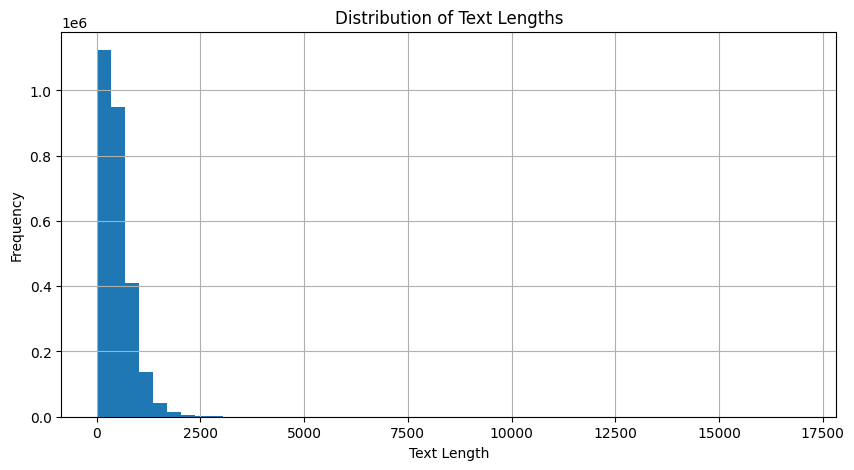

In [9]:
# Show basic statistics about the length of the 'text' field
df['text_length'] = df['text'].str.len()
print(df['text_length'].describe())

# Plot the distribution of text lengths
import matplotlib.pyplot as plt
df['text_length'].hist(bins=50, figsize=(10,5))
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()